<a href="https://colab.research.google.com/github/PRATEEK-RAJ-GUPTA/ENSEMBLE-LEARNING/blob/main/RANDOM_FOREST_INTRODUCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
     


In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.123298,-1.518532,-0.341537,1.522966,0.398702,0
1,0.047528,1.495218,-2.174522,-1.172549,-2.614199,1
2,-3.853049,-0.825849,-0.779627,-0.796674,1.658956,0
3,0.144662,0.175883,-3.069408,2.134858,0.231691,0
4,1.607067,2.206249,-2.518009,-2.153216,-0.273051,1


In [4]:
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [45]:
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df=df[cols]
  new_df['target']=df['target']  
  return new_df

In [12]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)
     

In [15]:
df1=sample_rows(df,0.1)

In [16]:
df2=sample_rows(df,0.1)

In [18]:
df3=sample_rows(df,0.1)

In [20]:
df3.shape

(10, 6)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [31]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df1.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df1.iloc[:,-1])

DecisionTreeClassifier()

In [32]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.583\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.5, 'x[1] <= 3.301\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

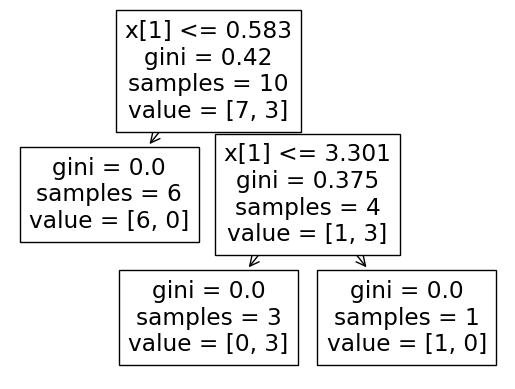

In [33]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.875, 'x[3] <= 0.693\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.5, 0.625, 'x[3] <= -1.231\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= -0.357\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

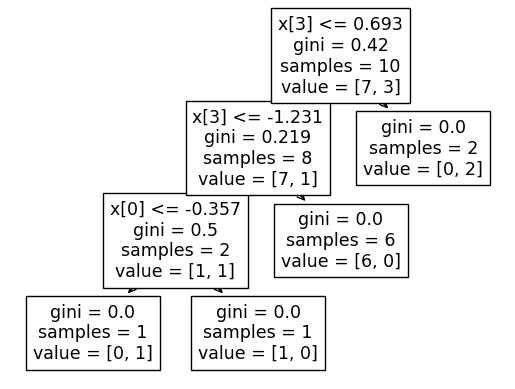

In [34]:
plot_tree(clf2)

[Text(0.6, 0.875, 'x[0] <= 1.692\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.4, 0.625, 'x[4] <= 0.96\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.375, 'x[4] <= 1.498\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

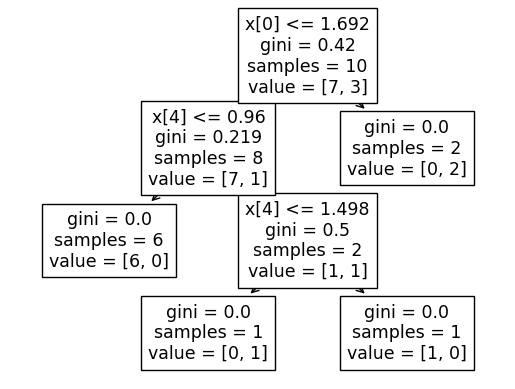

In [35]:
plot_tree(clf3)

In [37]:
clf1.predict(np.array([0.5551380,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [38]:
clf2.predict(np.array([0.5551380,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [39]:
clf3.predict(np.array([0.5551380,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## **COLUMN SAMPLING**

In [52]:
df1=sample_features(df,0.8)

<ipython-input-45-28d11cebe6cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [53]:
df2=sample_features(df,0.8)

<ipython-input-45-28d11cebe6cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [54]:
df3=sample_features(df,0.8)

<ipython-input-45-28d11cebe6cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [55]:
from sklearn.tree import DecisionTreeClassifier
mod1 = DecisionTreeClassifier()
mod2 = DecisionTreeClassifier()
mod3 = DecisionTreeClassifier()

In [56]:
df3.shape

(100, 5)

In [57]:
mod1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
mod2.fit(df2.iloc[:,0:4],df1.iloc[:,-1])
mod3.fit(df3.iloc[:,0:4],df1.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9, 'x[1] <= 0.453\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.3333333333333333, 0.7, 'x[2] <= 1.285\ngini = 0.375\nsamples = 64\nvalue = [16, 48]'),
 Text(0.16666666666666666, 0.5, 'x[3] <= -1.863\ngini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.3, 'x[0] <= 3.939\ngini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.5, 'x[3] <= 1.836\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.7, 'x[3] <= 1.547\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.8333333333

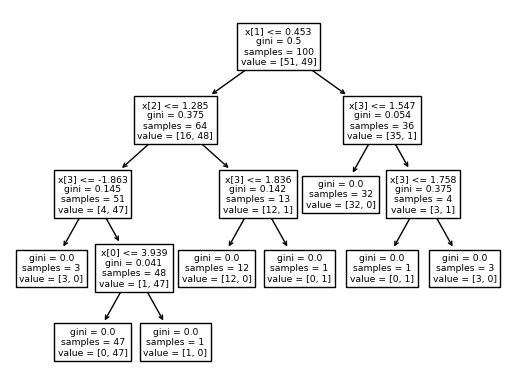

In [59]:
plot_tree(mod1)

[Text(0.5909090909090909, 0.9285714285714286, 'x[0] <= 0.453\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.36363636363636365, 0.7857142857142857, 'x[2] <= 1.285\ngini = 0.375\nsamples = 64\nvalue = [16, 48]'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[1] <= -1.072\ngini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2727272727272727, 0.5, 'x[0] <= -3.59\ngini = 0.078\nsamples = 49\nvalue = [2, 47]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[1] <= -0.363\ngini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(0.2727272727272727, 0.21428571428571427, 'x[3] <= 0.225\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.18181818181818182, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.36363636363636365, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Te

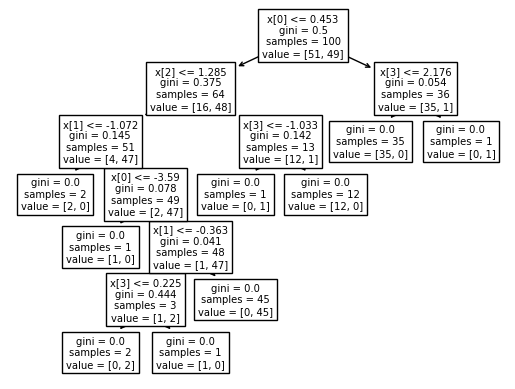

In [60]:
plot_tree(mod2)

[Text(0.625, 0.9285714285714286, 'x[1] <= 0.453\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.4166666666666667, 0.7857142857142857, 'x[0] <= 1.285\ngini = 0.375\nsamples = 64\nvalue = [16, 48]'),
 Text(0.25, 0.6428571428571429, 'x[2] <= -1.072\ngini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 3.939\ngini = 0.078\nsamples = 49\nvalue = [2, 47]'),
 Text(0.25, 0.35714285714285715, 'x[2] <= -0.363\ngini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(0.16666666666666666, 0.21428571428571427, 'x[0] <= 0.725\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(0.4166666666666667, 0.35714285714285715, 'gini = 0.0\n

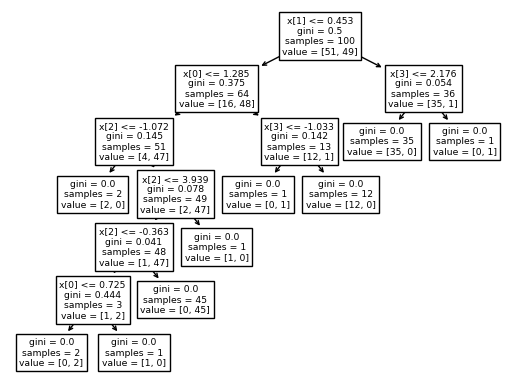

In [61]:
plot_tree(mod3)

In [62]:
df3

,col5,col4,col2,col3,target
0,0.398702,1.522966,-1.518532,-0.341537,0
1,-2.614199,-1.172549,1.495218,-2.174522,1
2,1.658956,-0.796674,-0.825849,-0.779627,0
3,0.231691,2.134858,0.175883,-3.069408,0
4,-0.273051,-2.153216,2.206249,-2.518009,1
...,...,...,...,...,...
95,1.853094,-0.834544,-2.460948,0.400042,0
96,0.096181,0.310748,-1.362275,-0.463021,0
97,-0.556467,0.049224,-0.267566,-0.791742,1
98,-1.095861,-0.682949,1.088149,1.579299,1


In [63]:
mod1.predict(np.array([0.096181,0.310748,-1.362275,-0.463021]).reshape(1,4))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [64]:
mod2.predict(np.array([0.096181,0.310748,-1.362275,-0.463021]).reshape(1,4))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [65]:
mod3.predict(np.array([0.096181,0.310748,-1.362275,-0.463021]).reshape(1,4))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

COMBINED SAMPLING

In [68]:
df1=combined_sampling(df,0.5,0.5)

<ipython-input-45-28d11cebe6cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [69]:
df2=combined_sampling(df,0.5,0.5)

<ipython-input-45-28d11cebe6cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [70]:
df3=combined_sampling(df,0.5,0.5)

<ipython-input-45-28d11cebe6cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [71]:
df3

,col4,col2,target
67,-0.383990,0.420430,1
49,-0.561109,-0.073966,1
77,0.652834,0.995459,0
63,1.515148,-0.330584,0
97,0.049224,-0.267566,1
51,3.129675,-1.870567,0
56,0.385723,0.199229,1
70,0.268842,-0.253741,1
73,-0.818181,0.706045,1
75,-1.152113,2.112405,1


In [72]:
df3.shape

(50, 3)

In [73]:
from sklearn.tree import DecisionTreeClassifier
mod1 = DecisionTreeClassifier()
mod2 = DecisionTreeClassifier()
mod3 = DecisionTreeClassifier()

In [74]:
mod1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
mod2.fit(df2.iloc[:,0:2],df1.iloc[:,-1])
mod3.fit(df3.iloc[:,0:2],df1.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.45454545454545453, 0.9375, 'x[1] <= -0.014\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.18181818181818182, 0.8125, 'x[1] <= -0.552\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.09090909090909091, 0.6875, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.2727272727272727, 0.6875, 'x[1] <= -0.485\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.18181818181818182, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.5625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7272727272727273, 0.8125, 'x[1] <= 1.215\ngini = 0.328\nsamples = 29\nvalue = [23, 6]'),
 Text(0.6363636363636364, 0.6875, 'x[1] <= 0.249\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.5454545454545454, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.7272727272727273, 0.5625, 'x[1] <= 0.339\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.6363636363636364, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.818181818181818

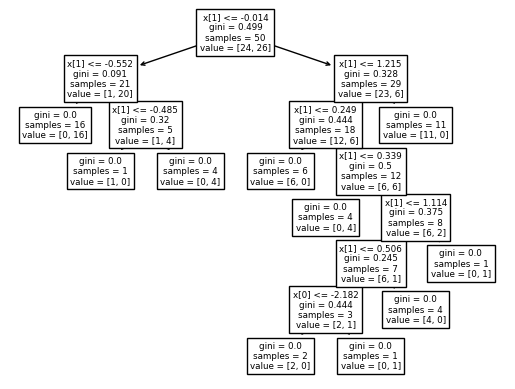

In [75]:
plot_tree(mod1)

[Text(0.48, 0.9444444444444444, 'x[1] <= -0.957\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.28, 0.8333333333333334, 'x[0] <= 0.129\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.2, 0.7222222222222222, 'x[0] <= -0.143\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.16, 0.6111111111111112, 'x[0] <= -0.216\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.12, 0.5, 'x[1] <= -2.304\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.08, 0.3888888888888889, 'x[0] <= -0.521\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.04, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16, 0.3888888888888889, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.24, 0.6111111111111112, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.36, 0.7222222222222222, 'x[1] <= -1.092\ngini = 0.469\nsamples = 8\nvalue 

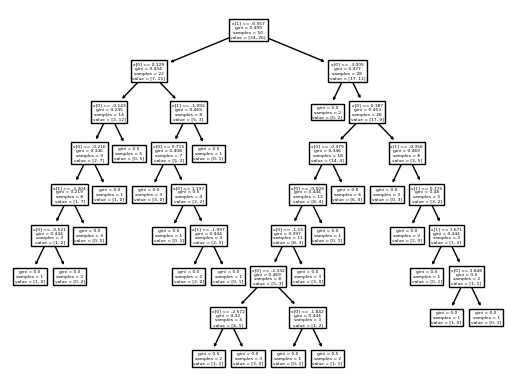

In [76]:
plot_tree(mod2)

[Text(0.38461538461538464, 0.95, 'x[1] <= -0.778\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.15384615384615385, 0.85, 'x[1] <= -2.727\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.07692307692307693, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.75, 'x[0] <= 2.233\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.15384615384615385, 0.65, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3076923076923077, 0.65, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.6153846153846154, 0.85, 'x[0] <= 1.0\ngini = 0.48\nsamples = 40\nvalue = [16, 24]'),
 Text(0.5384615384615384, 0.75, 'x[0] <= -2.09\ngini = 0.5\nsamples = 32\nvalue = [16, 16]'),
 Text(0.46153846153846156, 0.65, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6153846153846154, 0.65, 'x[1] <= 0.15\ngini = 0.495\nsamples = 29\nvalue = [16, 13]'),
 Text(0.46153846153846156, 0.55, 'x[1] <= -0.164\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.38461538461538464, 

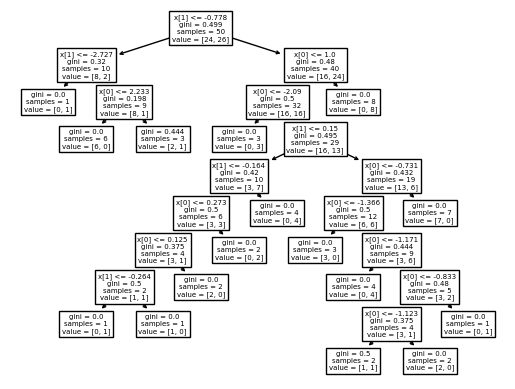

In [77]:
plot_tree(mod3)

In [79]:
mod3.predict(np.array([-1.271686,1.361789]).reshape(1,2))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [80]:
mod2.predict(np.array([-1.271686,1.361789]).reshape(1,2))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [81]:
mod1.predict(np.array([-1.271686,1.361789]).reshape(1,2))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])